# Demonstration of figure finder
## Before starting make sure that you have set the path where you want to dump all the figures (in shell/ff_setup, FIGURE_DUMP="your/path/here") and run the setup script to install it: by running
> bash shell/ff_setup setup


In [12]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import os
import figure_finder as ff



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


FOLDER ALREADY EXISTS!
Overwriting
deleting eg_report
Making folder


/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_finder/figure_finder/report_db_tools.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_db['tags'][i] = listish_str_to_list(report_db['tags'][i])
Missing chrome or resource URL: resource://gre/modules/UpdateListener.jsm
Missing chrome or resource URL: resource://gre/modules/UpdateListener.sys.mjs
Missing chrome or resource URL: resource://gre/modules/UpdateListener.jsm
Missing chrome or resource URL: resource://gre/modules/UpdateListener.sys.mjs


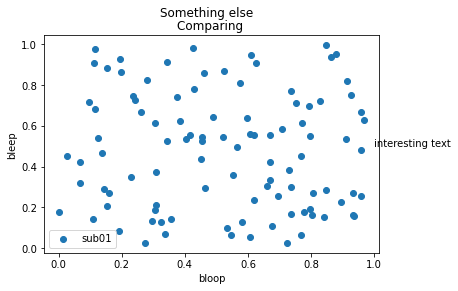

In [19]:
ff_Report = ff.ReportMaker('eg_report', '/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_finder')
with ff_Report:
    ff_Report.add_title('Blah level 1', level=1)
    ff_Report.add_title('Blah level 2', level=2)
    ff_Report.add_text('''Generic description doo doo doo hello 
    Now we can save the figure in the fig_dump folder
    >> we can specify the name of the file (or ff will extract the title from the figure). 
    We can also specify the tags we want to save with this fig. ff will automatically find *any* text in the fig (legend, axes, text) and 
    scrape these to include in the tags (so don't worry too much)
    Figure name & the date will also be saved as tags
    >> First we will save this to our local folder''')
    # now add the image
    x = np.random.random(100)
    y = np.random.random(100)
    plt.scatter(x,y, label='sub01')
    plt.xlabel('bloop')
    plt.ylabel('bleep')
    plt.title('Comparing ')
    plt.text(1,.5, 'interesting text')
    plt.legend()
    fig = plt.gcf()
    fig.suptitle('Something else')
    ff_Report.add_img(fig)
    ff_Report.save_html()

First - lets make some figures and save them in the figure dump folder

scatter-demo already exists...
Overwrite ? ("o")
Skip ? ("s")
Save copy with date ? ("d")
To automatically choose one of these options edit "fig_overwrite" argument in utils.save_figure_with_tags
deleting scatter-demo
Inserting info into svg file


{'name': 'scatter-demo',
 'date': '2023-05-28_18-42-20',
 'path': '/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_finder/scatter-demo',
 'tags': ['2023-05-28_18-42-20',
  'Comparing',
  'text',
  'sub01',
  '0.4',
  '0.0',
  'else',
  'interesting',
  'bleep',
  'Something',
  '0.8',
  'optional-tags',
  '1.0',
  '2023-05-28T18:42:25.590776',
  'bloop',
  '0.2',
  'scatter-demo',
  '0.6'],
 'cwd': '/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_finder',
 'nb_path': '/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_finder/example.ipynb'}

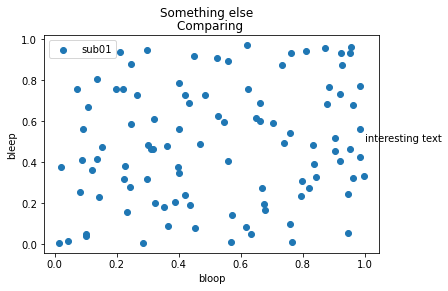

In [20]:
# scatter demo 
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x,y, label='sub01')
plt.xlabel('bloop')
plt.ylabel('bleep')
plt.title('Comparing ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')


# Now we can save the figure in the fig_dump folder
# >> we can specify the name of the file (or ff will extract the title from the figure). 
# We can also specify the tags we want to save with this fig. ff will automatically find *any* text in the fig (legend, axes, text) and 
# scrape these to include in the tags (so don't worry too much)
# Figure name & the date will also be saved as tags
# >> First we will save this to our local folder 
ff.FIG_save_fig_and_code_as_svg(fig, fig_name='scatter-demo', fig_tags=['optional-tags'], save_folder=os.getcwd())


Now check open the SVG file (scatter-demo.svg) using a text editor - you should be able to see all the extra information has been added
Look under 

*********** START - info inserted by figure finder ********

The text file also contains the code from the cell which made this figure

line-demo already exists...
Overwrite ? ("o")
Skip ? ("s")
Save copy with date ? ("d")
To automatically choose one of these options edit "fig_overwrite" argument in utils.save_figure_with_tags
Adding date to fig name to remove conflict...
Inserting info into svg file


{'name': 'line-demo_2023-05-28_18-42-31',
 'date': '2023-05-28_18-42-31',
 'path': '/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_dump/line-demo_2023-05-28_18-42-31',
 'tags': ['tock',
  'text',
  'Something',
  'line-demo',
  '2023-05-28_18-42-31',
  '0.4',
  'line-demo_2023-05-28_18-42-31',
  '0.6',
  'interesting',
  '2023-05-28T18:23:32.406666',
  'tick',
  '2023-05-28_18-23-32',
  'here',
  'sub02',
  '0.0',
  'else',
  '0.8',
  '1.0',
  '2023-05-28T18:42:33.170197',
  '0.2'],
 'cwd': '/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_finder',
 'nb_path': '/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_finder/example.ipynb'}

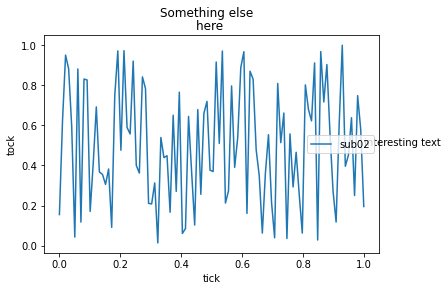

In [21]:
# Now lets save another figure.

# Make line demo 
x = np.linspace(0,1, 100)
y = np.random.random(100)
plt.plot(x,y, label='sub02')
plt.xlabel('tick')
plt.ylabel('tock')
plt.title('here ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')

ff.FIG_save_fig_and_code_as_svg(fig, fig_name='line-demo')
# This time we haven't specified where the figure is going -> so it will be put in the figure dump folder...


# Database functions 
## We now have 2 figures which have been saved using figure_finder. We can access them in the csv database (stored in figure_dump)


In [22]:
# Figure database is a csv folder inside the figure dump folder
# > we can load this and look at the entries
fig_db = ff.FIG_load_figure_db()
fig_name_list = fig_db.name.copy()
fig_db['path'][1]
fig_db
# for i, this_fig in enumerate(fig_name_list):
#     print(this_fig)

# bb = [0,2]
# z = fig_db.loc[bb].copy()


,name,date,path,tags,cwd,nb_path
0,line-demo_2023-05-28_18-42-31,2023-05-28_18-42-31,/data1/projects/dumoulinlab/Lab_members/Marcus...,"[tock, text, Something, line-demo, 2023-05-28_...",/data1/projects/dumoulinlab/Lab_members/Marcus...,/data1/projects/dumoulinlab/Lab_members/Marcus...
1,scatter-demo,2023-05-28_18-42-20,/data1/projects/dumoulinlab/Lab_members/Marcus...,"[2023-05-28_18-42-20, Comparing, text, sub01, ...",/data1/projects/dumoulinlab/Lab_members/Marcus...,/data1/projects/dumoulinlab/Lab_members/Marcus...
2,fig000_Something_else,2023-05-28_18-41-55,/data1/projects/dumoulinlab/Lab_members/Marcus...,"[text, Something, bleep, oDyEHE, eg_report, 20...",/data1/projects/dumoulinlab/Lab_members/Marcus...,/data1/projects/dumoulinlab/Lab_members/Marcus...
3,fig000_Something_else,2023-05-28_18-39-11,/data1/projects/dumoulinlab/Lab_members/Marcus...,"[text, Something, bleep, HuCJGs, eg_report, 0....",/data1/projects/dumoulinlab/Lab_members/Marcus...,/data1/projects/dumoulinlab/Lab_members/Marcus...
4,line-demo,2023-05-28_18-23-32,/data1/projects/dumoulinlab/Lab_members/Marcus...,"[tock, tick, text, 0.4, 0.0, else, interesting...",/data1/projects/dumoulinlab/Lab_members/Marcus...,/data1/projects/dumoulinlab/Lab_members/Marcus...


In [ ]:
ff.FIG_remove_fig_with_tags('')

In [ ]:
ff.FIG_clean_csv()

fig_db is a list of dictionaries, with each entry in the list corresponding to a particular figure
Each figure has the:
* 'date' : date that fig was saved
* 'name' : name of the file
* 'path' : path to the fig (.png file)
* 'tags' : tags - those extracted from the fig, also those which the user specified before hand. these can be used to search for your figures, (both inclusive & exclusive)
* 'cwd' : the directory where the fig was generated 
* 'nb_path' : the notebook where the figure was generated



In [ ]:
# You can see that all the text in the figure has been extracted and saved as tags...
print(fig_db[0]['tags'])
# We can use these tags to search for the figure

In [ ]:
# Now a demo search for a figure...
# both figures had the text "interesting text" - so if we search for this 2 entries come up
match_fig = ff.find_fig_with_tags(['interesting'])
print(f'Found {len(match_fig)} matching figures...')

In [ ]:
opj = os.path.join
figure_dump = os.environ['FIG_DUMP']
fig_tag_file = opj(figure_dump, 'fig_tag_file.csv') # path to figure data base
figure_dump_bin = opj(figure_dump, 'recycle_bin')   # path to bin - this is where deleted files will be backed up

import pandas as pd

a = pd.read_csv(fig_tag_file).to_dict('index')
b = pd.read_csv(fig_tag_file)


In [ ]:
b['tags'][0]

In [ ]:
b = pd.DataFrame(a).T
b

In [ ]:
b['name']

In [ ]:
[a['name'][i] for i in range(len(a))]

In [ ]:
# we can refine the search using more tags
match_fig = ff.find_fig_with_tags(['interesting', 'scatter'])
print(f'Found {len(match_fig)} matching figures...')

# we can see the matching figure is the scatter plot... 
print(match_fig[0]['name'])


In [ ]:
# OR we can refine the search using by excluding certain tags
match_fig = ff.find_fig_with_tags(['interesting'], exclude=['scatter'])
print(f'Found {len(match_fig)} matching figures...')

# we can see the matching figure is NOT the scatter plot... 
print(match_fig[0]['name'])


The tags can be any text which is present in the figure (or which was specified)
It can also be the date 

In [ ]:
# We can find  out more about the matching figure in from the entries in the db (e.g., looking at name, date, nb_path)
# Or we can simply load the figure, using the same search terms 
ff.show_fig_with_tags(['interesting'], exclude=['scatter'])

# For more detail we can print the code which was used to generate this figure...
ff.print_matching_code_file(['interesting'], exclude=['scatter'])

Note - if you try and save a figure with the same name, then it will ask you whether you want to overwrite ('o'), skip ('s') or append the date to the file name. 
You can edit the function so that it doen't ask you every time

In [ ]:
# scatter demo 
x = np.linspace(0,1, 100)
y = np.random.random(100)
plt.plot(x,y, label='sub02')
plt.xlabel('tick')
plt.ylabel('tock')
plt.title('here ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')

ff.save_fig_and_code_as_svg(fig, fig_name='line-demo')# SAME NAME AS BEFORE...

# Best practice is probably to specify a new name - but this still works....

You can also remove entries using the function below...
# NOTE DO THIS AT YOUR OWN RISK -> I HAVEN'T THOROUGHLY TESTED THIS...

In [ ]:
ff.remove_fig_with_tags('scatter-demo')